In [ ]:
# Fix datareader unable read yahoo url
# https://stackoverflow.com/questions/68230237/python-pandas-datareader-and-yahoo-error-remotedataerror-unable-to-read-url
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

In [2]:
# choose date range
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2021, 10, 23)

# pick stock
stock = "ETH-USD"
close_price = "Close" # Adj Close or Close
spy_data = web.DataReader(stock, "yahoo", start_date, end_date)
spy_data = spy_data[~spy_data.index.duplicated(keep='last')] # Fix duplicate data

# config regular investing
periods = 300
freq = '1D'
initial_investment = 25

spy_data.head() # review data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,749.201843,719.792236,737.708374,730.367554,1.365200e+10,730.367554
2021-01-02,786.798462,718.109497,730.402649,774.534973,1.974077e+10,774.534973
2021-01-03,1006.565002,771.561646,774.511841,975.507690,4.520046e+10,975.507690
2021-01-04,1153.189209,912.305359,977.058838,1040.233032,5.694599e+10,1040.233032
2021-01-05,1129.371460,986.811279,1041.498779,1100.006104,4.153593e+10,1100.006104


In [3]:
def lumpsum(invest_date, initial_investment):
    invest_price = spy_data.loc[invest_date][close_price]
    incre_holdings = initial_investment / invest_price
    
    return incre_holdings, invest_price

In [4]:
def regular_investing(invest_date, periods = periods, freq = freq, initial_investment = initial_investment): 
    
    # Get DCA dates
    dca_dates =  investment_dates_all = pd.date_range(invest_date, periods=periods, freq=freq)

    # Filter out ones past the last data day
    dca_dates = dca_dates[dca_dates < spy_data.index[-1]]

    print(len(dca_dates))

    total_investment = 0
    incre_holdings = 0
    accumulated_value = 0

    total_investment_list = []
    accumulated_value_list = []
    trading_date_list = []
    
    for date in dca_dates:
        # Get an actual trading day
        trading_date = spy_data.index[spy_data.index.searchsorted(date)]

        total_investment += initial_investment

        a,b = lumpsum(trading_date,initial_investment)
        incre_holdings += a

        accumulated_value = incre_holdings * b

        trading_date_list.append(trading_date)
        total_investment_list.append(total_investment)
        accumulated_value_list.append(accumulated_value)

    return total_investment_list,accumulated_value_list,trading_date_list
        

In [ ]:
def regular_investing1(invest_date, periods=627, freq='7D', initial_investment=100): 
    
    # Get DCA dates
    dca_dates =  investment_dates_all = pd.date_range(invest_date, periods=periods, freq=freq)

    # Filter out ones past the last data day
    dca_dates = dca_dates[dca_dates < spy_data.index[-1]]

    total_investment = 0
    incre_holdings = 0
    accumulated_value = 0

    total_investment_list = []
    accumulated_value_list = []
    trading_date_list = []
    
    for date in dca_dates:
        # Get an actual trading day
        trading_date = spy_data.index[spy_data.index.searchsorted(date)]

        total_investment += initial_investment/periods

        a,b = lumpsum(trading_date,initial_investment = initial_investment/periods)
        incre_holdings += a

        accumulated_value = incre_holdings * b

        trading_date_list.append(trading_date)
        total_investment_list.append(total_investment)
        accumulated_value_list.append(accumulated_value)

    return total_investment_list,accumulated_value_list,trading_date_list
        

296


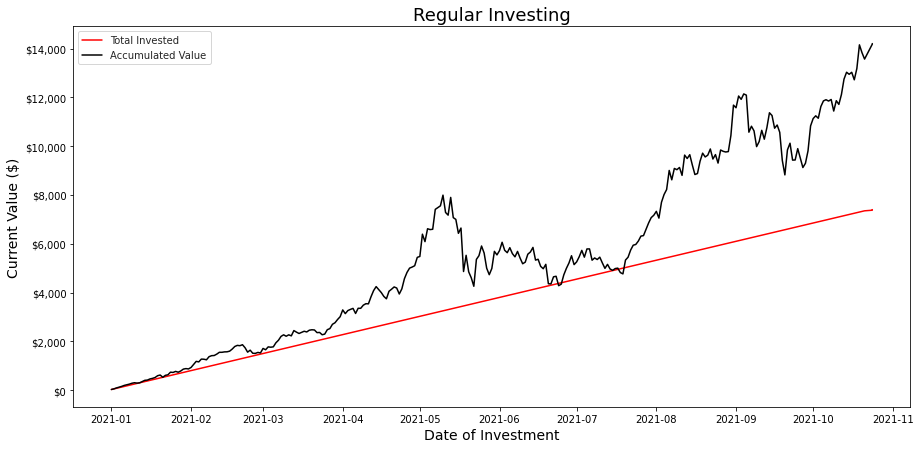

Invest Times: 296
Return: 91.97%


In [5]:
# Simulate 
total_investment,accumulated_value,trading_date = regular_investing(spy_data.index[0])

# Create Plot
fig, ax = plt.subplots()

# Style and size
sns.set_style("whitegrid")
fig.set_size_inches(15, 7)

# Plot Series
ax.plot(trading_date, total_investment, color='red')
ax.plot(trading_date, accumulated_value, color='black')

# Set Y axis format 
tick = ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(tick) 

# Labels
ax.set_title('Regular Investing', size=18)
ax.set_ylabel('Current Value ($)', size=14)
ax.set_xlabel('Date of Investment', size=14)

# Show with Legend
plt.legend(['Total Invested', 'Accumulated Value'])
plt.savefig(stock+'.png')
plt.show()

times = len(total_investment)
last = times - 1

print("Invest Times:",times)
print("Return: {:.2%}".format(accumulated_value[last] / total_investment[last] - 1))

In [6]:
def invest_all(invest_date, principal=10000):
    invest_price = spy_data.loc[invest_date]['Close']
    current_price = spy_data['Close'][-1]
    #print(invest_date,invest_price,current_price)
    #print(current_price / invest_price)
    
    investment_return = current_price / invest_price
    
    return principal*investment_return

No handles with labels found to put in legend.


<Figure size 1080x432 with 0 Axes>

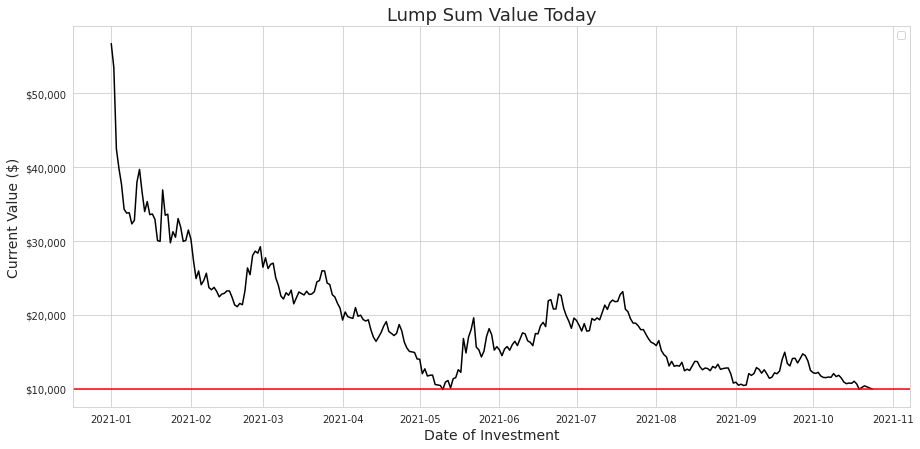

295

In [7]:
# Lump Sum 

# Simulate Lump Sum Investing
lump_sum = [invest_all(x) for x in spy_data.index]

# Format and plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots()

# Style and size
sns.set_style("whitegrid")
fig.set_size_inches(15, 7)

# Plot Series
ax.plot(spy_data.index, lump_sum, color='black')
plt.axhline(y=10000, color='r', linestyle='-')

# Set Y axis format 
tick = ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(tick)

# Labels
ax.set_title('Lump Sum Value Today', size=18)
ax.set_ylabel('Current Value ($)', size=14)
ax.set_xlabel('Date of Investment', size=14)

# Show with Legend
plt.legend()
plt.savefig('lumpsum.png')
plt.show()

len(lump_sum)